**<H1> Suicide Rate Trend Analysis**

The given dataset includes the following parameters:
* Country
* Year
* Sex
* Age
* Number of suicides
* Population
* Country-year
* HDI for year
* GDP for year
* GDP per capita
* Generation

**<h2> Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
data=pd.read_csv('master.csv')

In [5]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

The next line helps display the variable type 

In [7]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

Next line gives us a concise summary of the dataframe.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


**<h2> Exploratory Data Analysis**

In [10]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]

In [11]:
data.drop(" gdp_for_year",axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB




gdp_for_year is numerical feature, but due to comma seperated number it is stored as string


In [13]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [14]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900


In [15]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

**<h3>Count Plot for Generations**

<AxesSubplot:xlabel='generation', ylabel='count'>

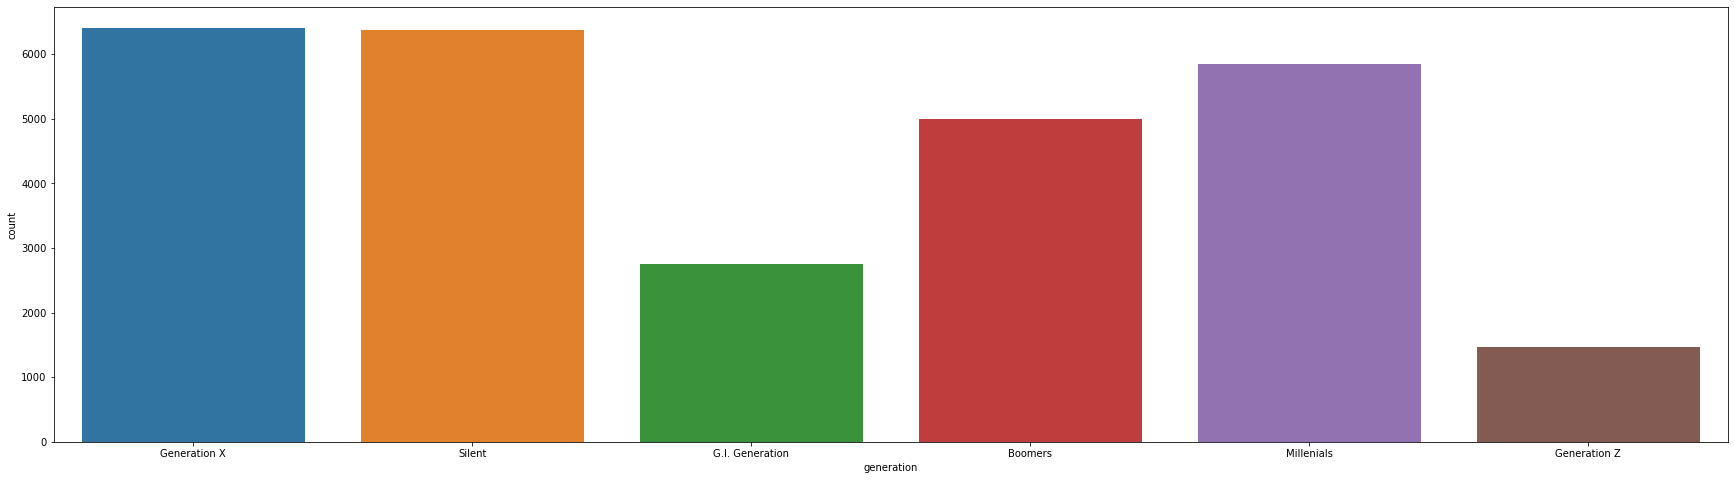

In [19]:
plt.figure(figsize=(30,8))
sns.countplot(data['generation'])

**<h3> Comparing Number of Suicides Between Both Genders**

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

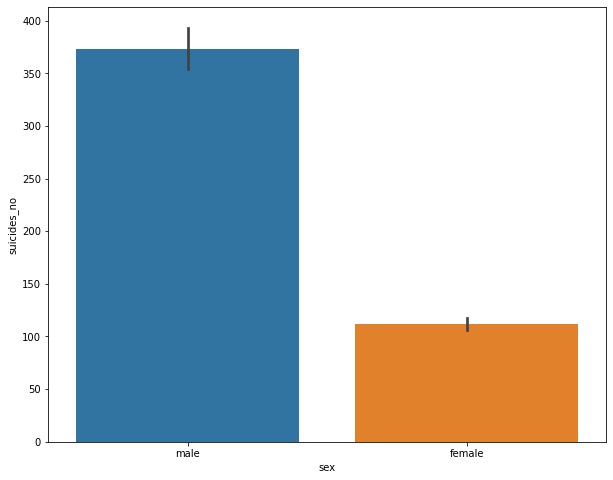

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x='sex',y='suicides_no',data=data)

**<h3>GDP trend over the years**

Text(0, 0.5, 'GDP Per Year')

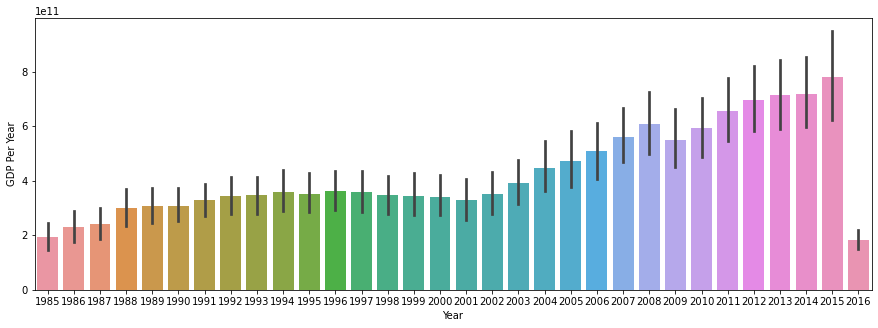

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='gdp_for_year',data=data)
plt.xlabel('Year')
plt.ylabel('GDP Per Year')

**<h3> Suicide rate over the given period between both genders**

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

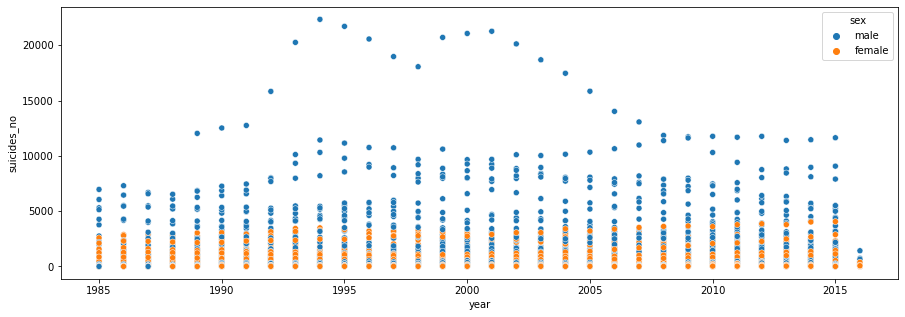

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='year',y='suicides_no',hue='sex',data=data)

<AxesSubplot:>

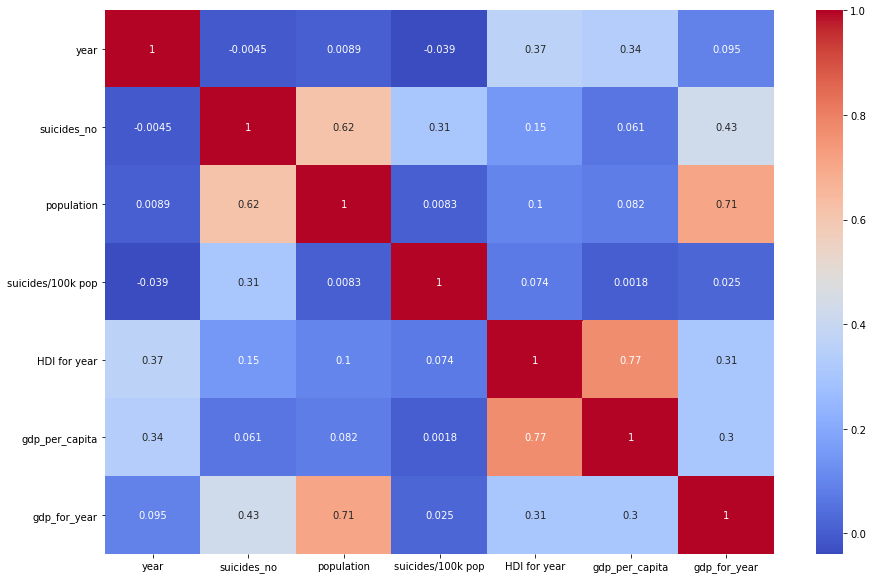

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

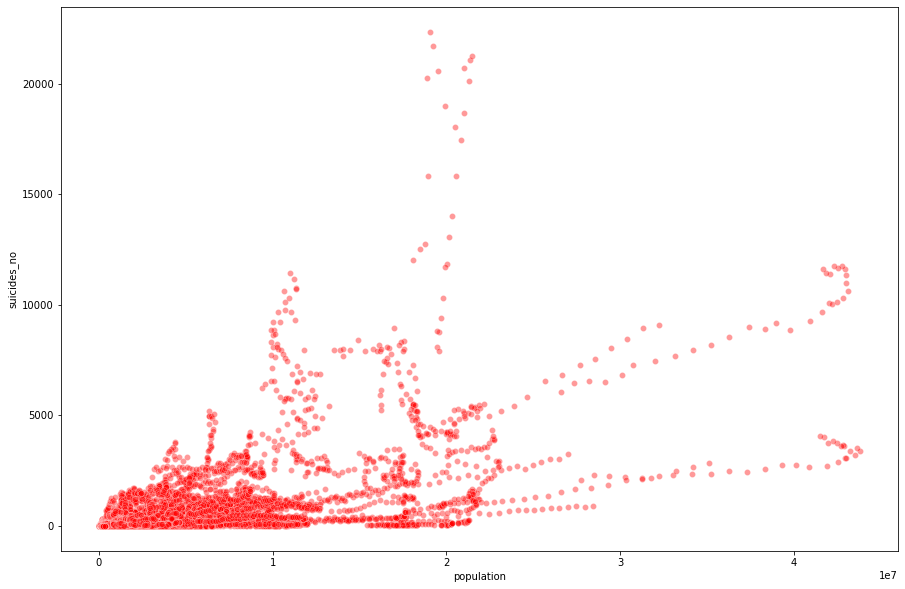

In [71]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'population',y='suicides_no', data=data, color='red', alpha=0.4)

**<h3>Trends between Year and Suicide Numbers**

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

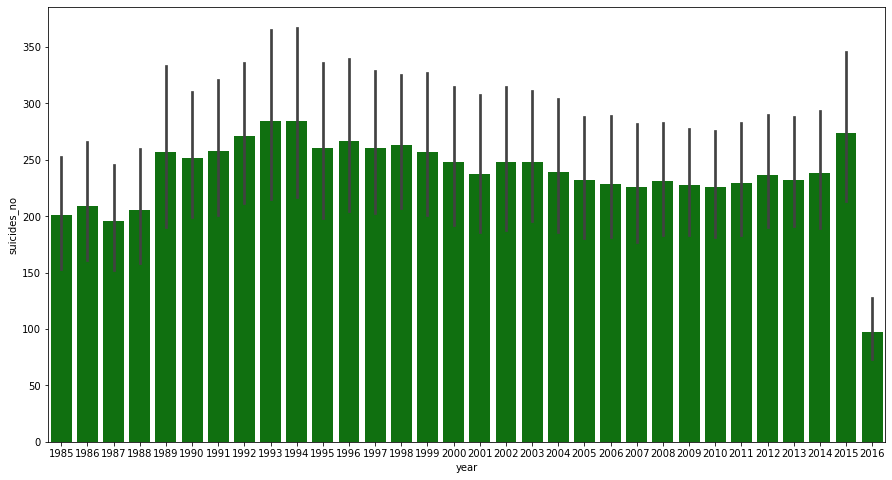

In [86]:
plt.figure(figsize=(15,8))
sns.barplot(x='year',y='suicides_no',data=data, color='green')

**<h3>Trends between Year and Population**

<AxesSubplot:xlabel='year', ylabel='population'>

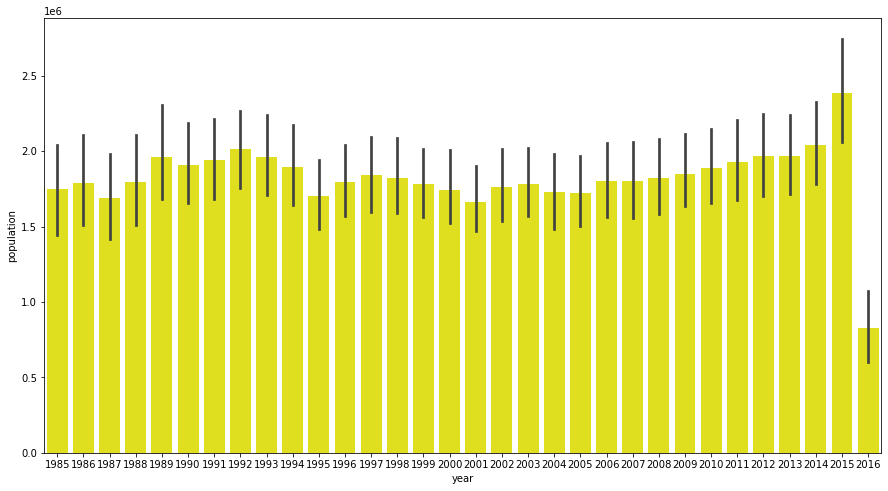

In [87]:
plt.figure(figsize=(15,8))
sns.barplot(x='year',y='population',data=data, color='yellow')

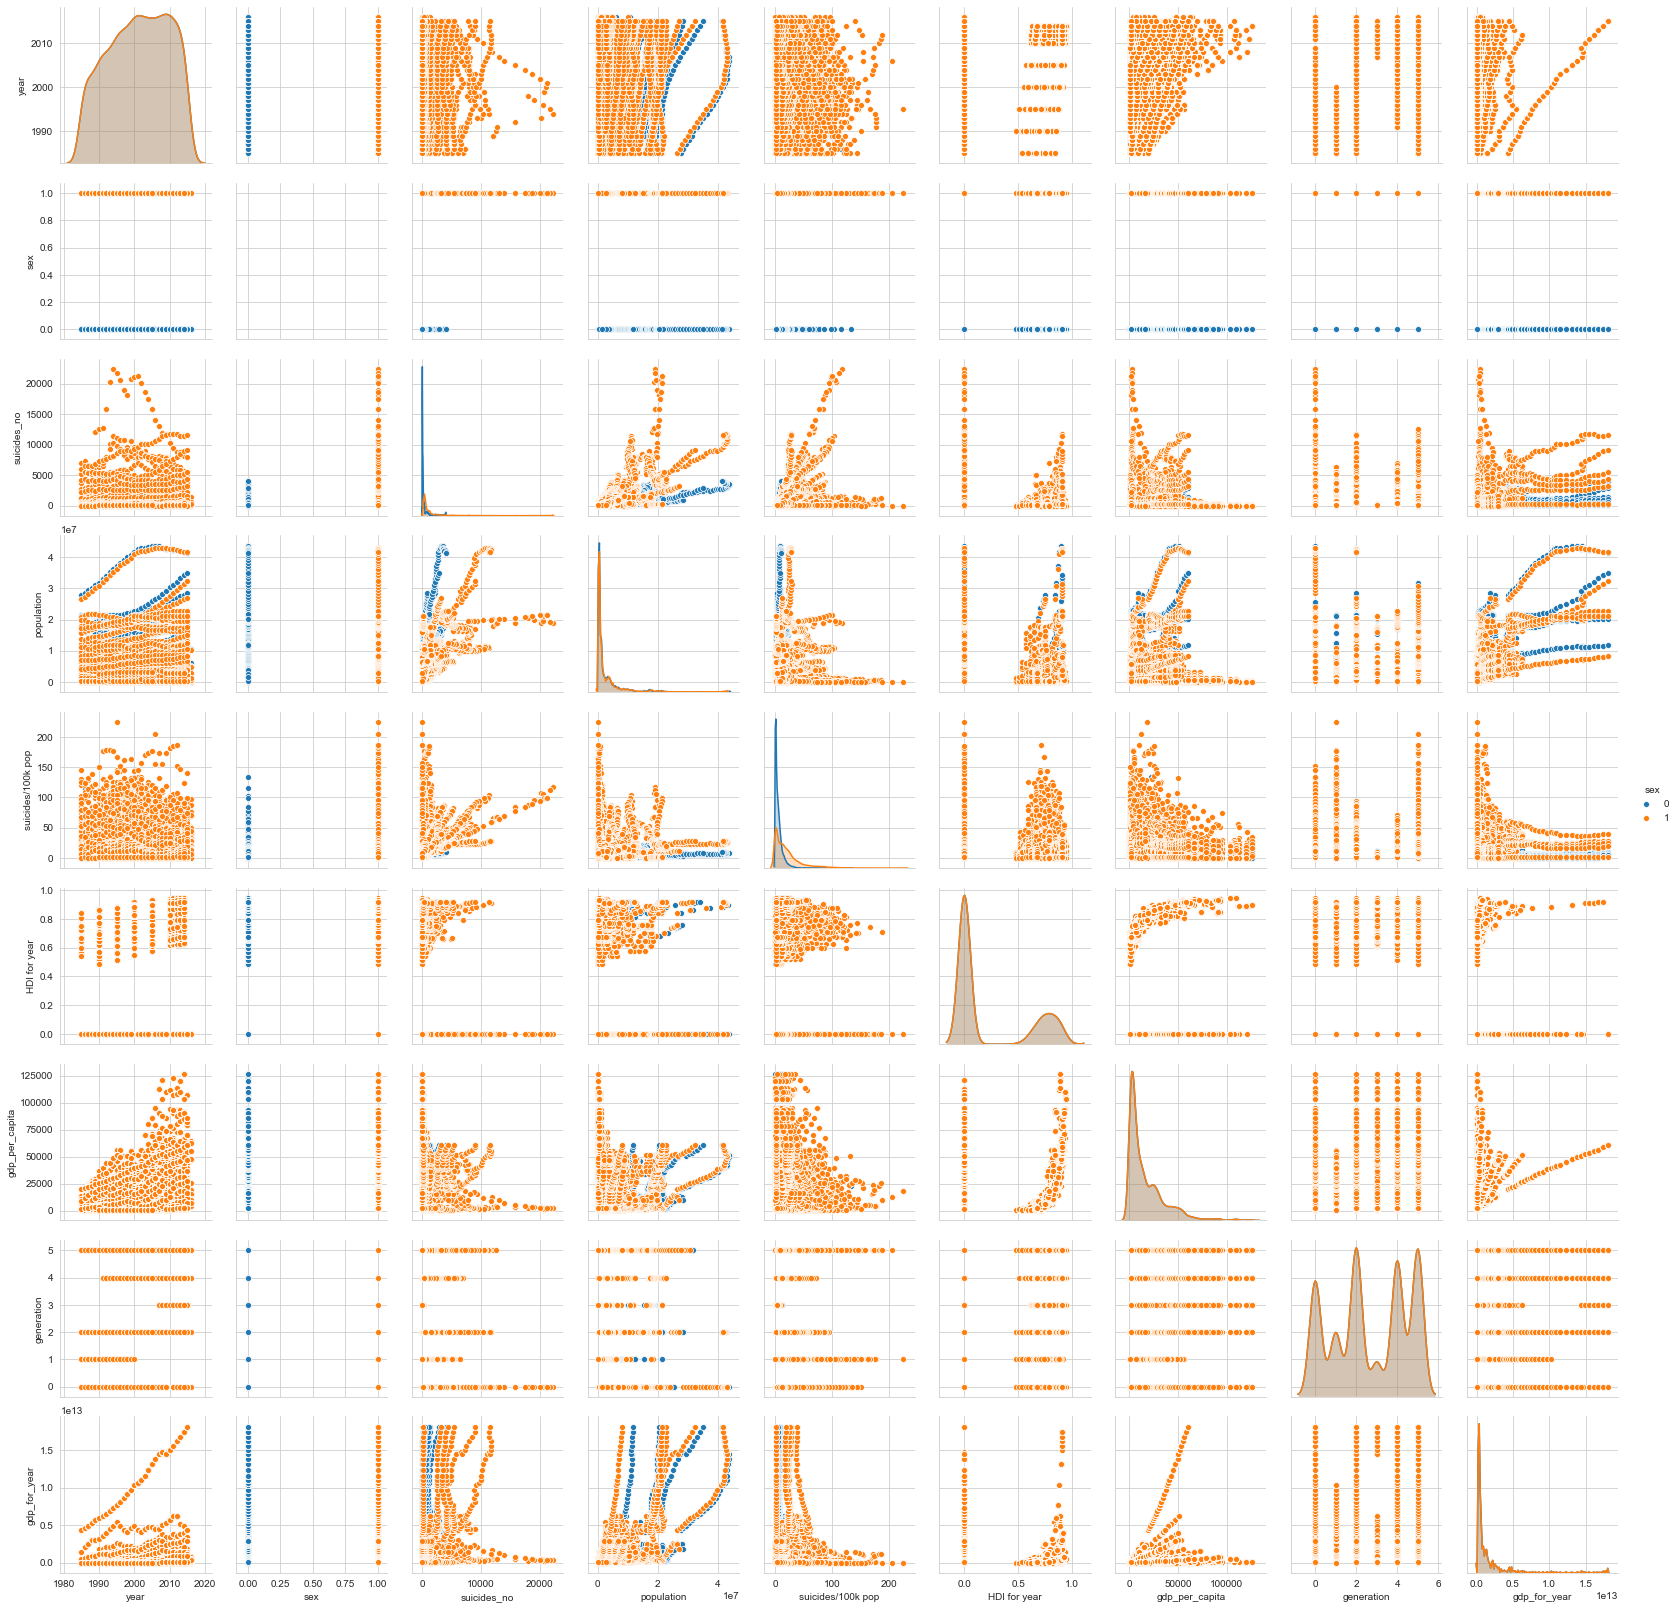

In [34]:
sns.pairplot(data,hue="sex")

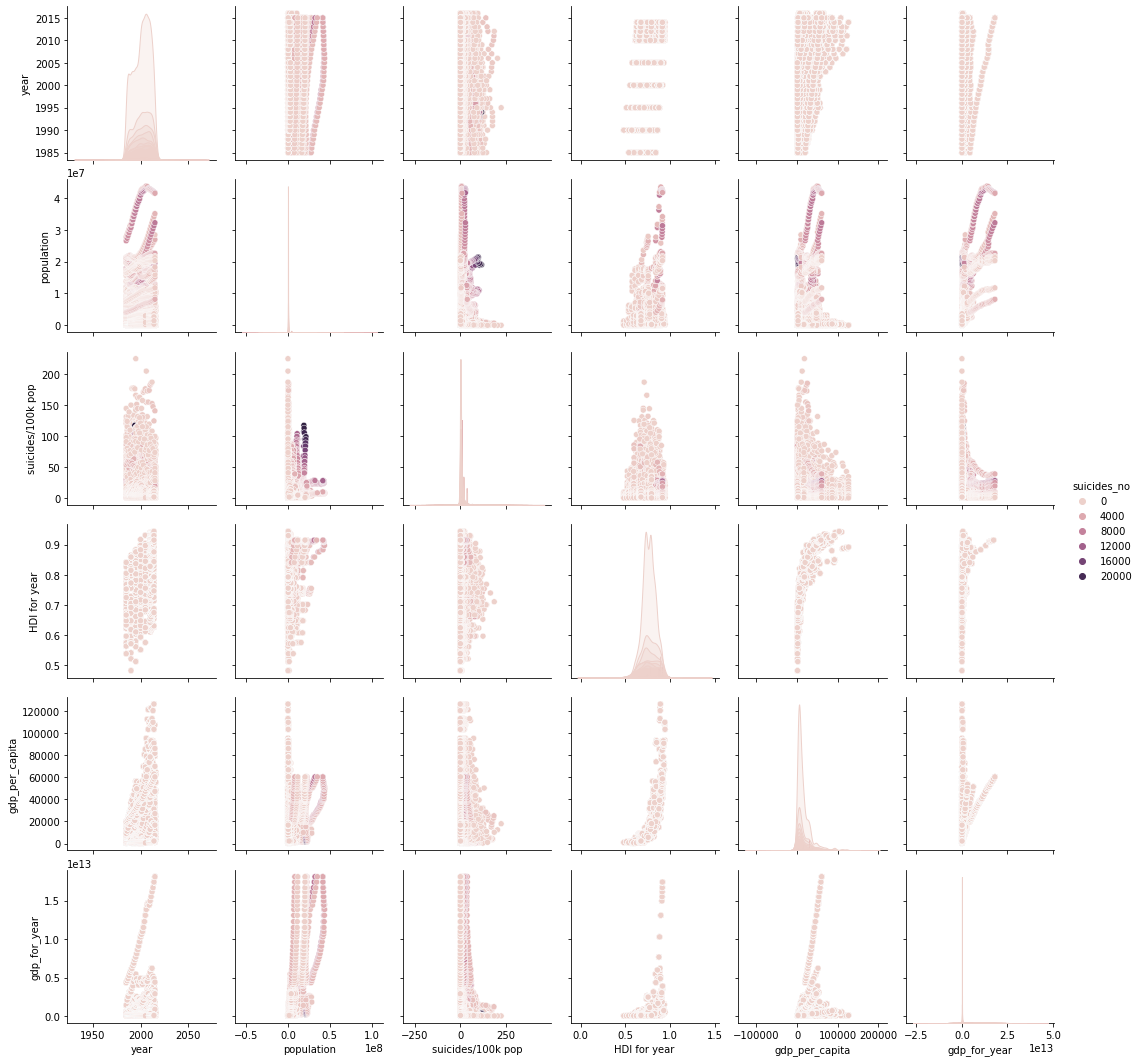

In [90]:
sns.pairplot(data,hue="suicides_no")

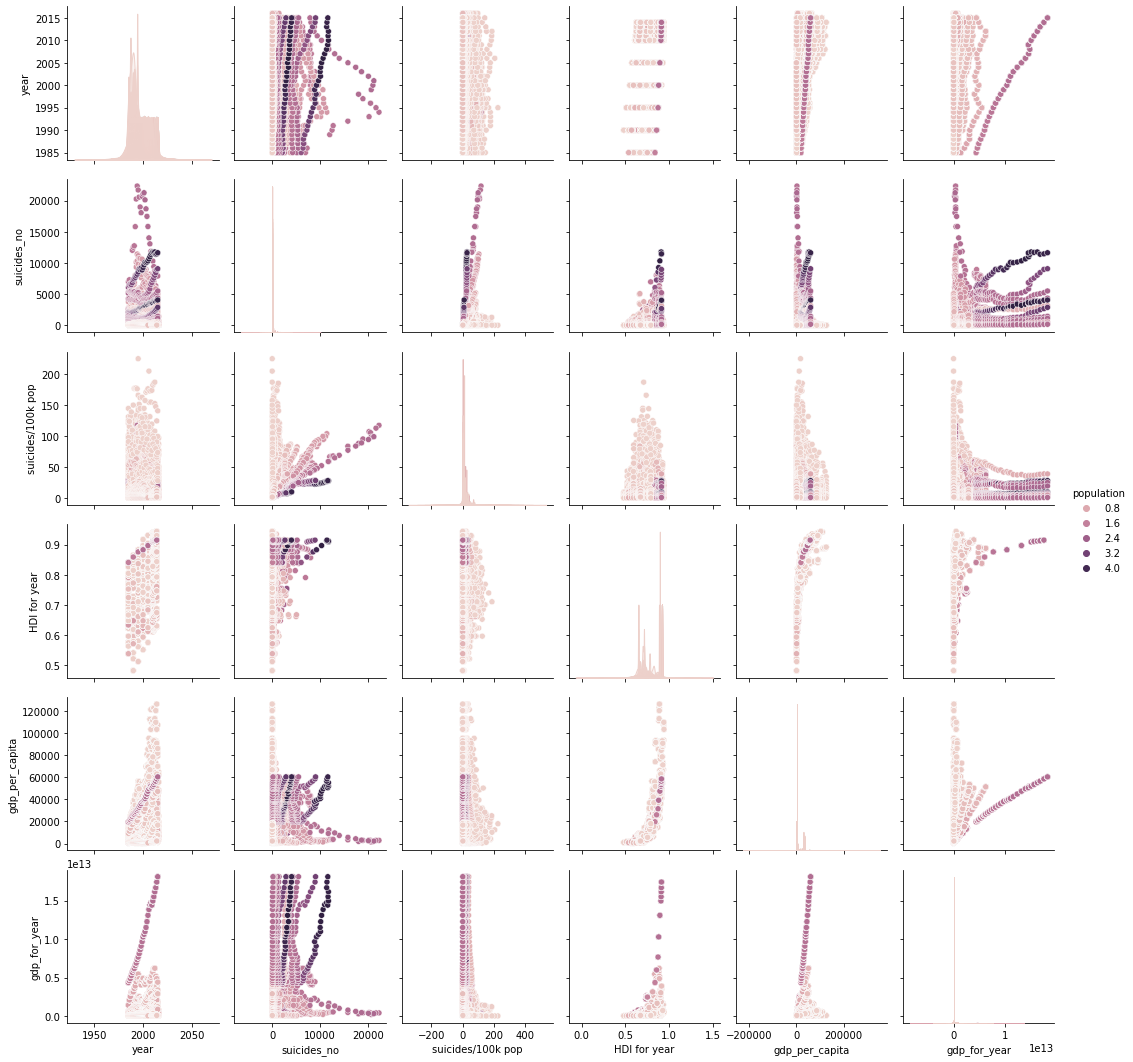

In [91]:
sns.pairplot(data,hue="population")